In [0]:
datadir_test='/content/drive/My Drive/Project (1)/dataset (1)/test'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
categories=['Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Potato___healthy','Tomato___healthy','Corn_(maize)___Common_rust_','Tomato___Bacterial_spot','Tomato___Early_blight','Potato___Early_blight','Potato___Late_blight']

In [0]:
len(categories)

13

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [0]:
test_data=[]
def create_test_data():
    for category in categories:
        path=datadir_test+'/'+category
        print(path)
        
        class_num=categories.index(category)
        for image in os.listdir(path):
            try:
                img_arr=cv2.imread(path+'/'+str(image))
                new_arr=cv2.resize(img_arr,(200,200))
                test_data.append([new_arr,class_num])
            except Exception as e:
                pass
create_test_data()

/content/drive/My Drive/Project (1)/dataset (1)/test/Corn_(maize)___Northern_Leaf_Blight
/content/drive/My Drive/Project (1)/dataset (1)/test/Corn_(maize)___healthy
/content/drive/My Drive/Project (1)/dataset (1)/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
/content/drive/My Drive/Project (1)/dataset (1)/test/Grape___Black_rot
/content/drive/My Drive/Project (1)/dataset (1)/test/Grape___Esca_(Black_Measles)
/content/drive/My Drive/Project (1)/dataset (1)/test/Grape___healthy
/content/drive/My Drive/Project (1)/dataset (1)/test/Potato___healthy
/content/drive/My Drive/Project (1)/dataset (1)/test/Tomato___healthy
/content/drive/My Drive/Project (1)/dataset (1)/test/Corn_(maize)___Common_rust_
/content/drive/My Drive/Project (1)/dataset (1)/test/Tomato___Bacterial_spot
/content/drive/My Drive/Project (1)/dataset (1)/test/Tomato___Early_blight
/content/drive/My Drive/Project (1)/dataset (1)/test/Potato___Early_blight
/content/drive/My Drive/Project (1)/dataset (1)/test/Potato___Late_bl

In [0]:
X_test=[]
y_test=[]

In [0]:
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [0]:
X_test=np.array(X_test).reshape(-1,200,200,3)

In [0]:
print(X_test.shape)

(2854, 200, 200, 3)


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [0]:
new_model=tf.keras.models.load_model('/content/drive/My Drive/asm.h5')
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 64)        0         
_________________________________________________________________
fla

In [0]:
score1=new_model.evaluate(X_test,y_test,verbose=0)
print('Test loss:',score1[0])
print('Test accuracy:',score1[1])

Test loss: 0.8963688538208636
Test accuracy: 0.77330065


In [0]:
predictions = new_model.predict(X_test)

In [0]:
predictions[0]

array([0.25000325, 0.00837718, 0.0130884 , 0.06306622, 0.02056194,
       0.00145654, 0.04693739, 0.04919636, 0.00125334, 0.26464579,
       0.06343961, 0.00871051, 0.20926347], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  print("{} {} {:2.0f}% ({})".format(i,categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]))



500 Grape___Black_rot 59% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
501 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
502 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
503 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
504 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
505 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
506 Grape___Black_rot 74% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
507 Grape___Black_rot 92% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
508 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
509 Grape___Black_rot 62% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
510 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 100% (Grape___Leaf_blight_(Isariopsis_Leaf_Spot))
511 Grape___Leaf_blight_(Isariopsis_L

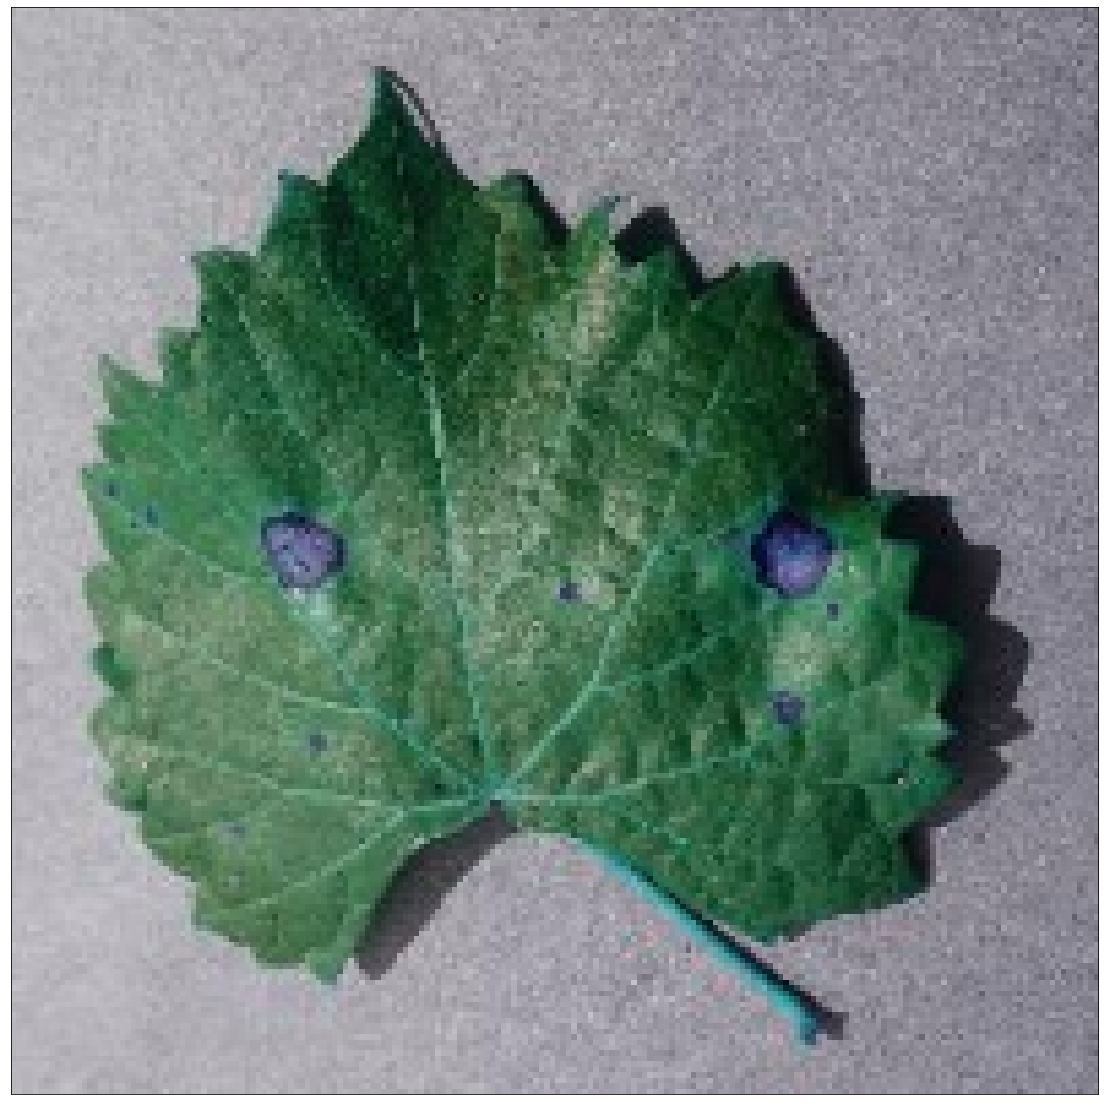

In [0]:
num_rows = 10
num_cols = 20
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(500,(500+num_images)):
  #plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #plot_value_array(i, predictions[i], test_labels)
#plt.tight_layout()
#plt.show()

In [0]:
}